## Projet Manipulation image

## Valeurs de couleurs
R ( 8 bits) intensite pour la couleur rouge
G ( 8 bits) intensite pour la couleur verte
B ( 8 bits ) intensite pour la couleur bleu
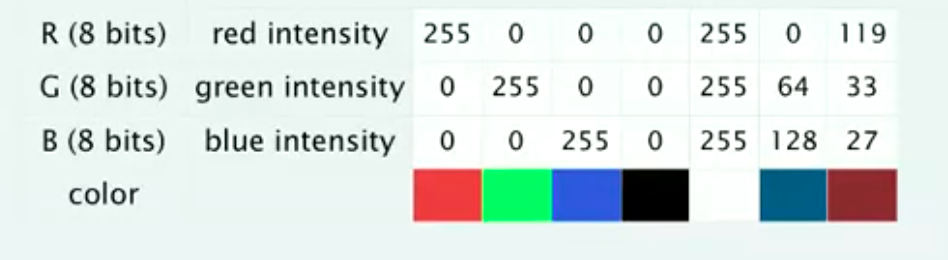

In [115]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from PIL import Image 
import random
import matplotlib.image as mpimg

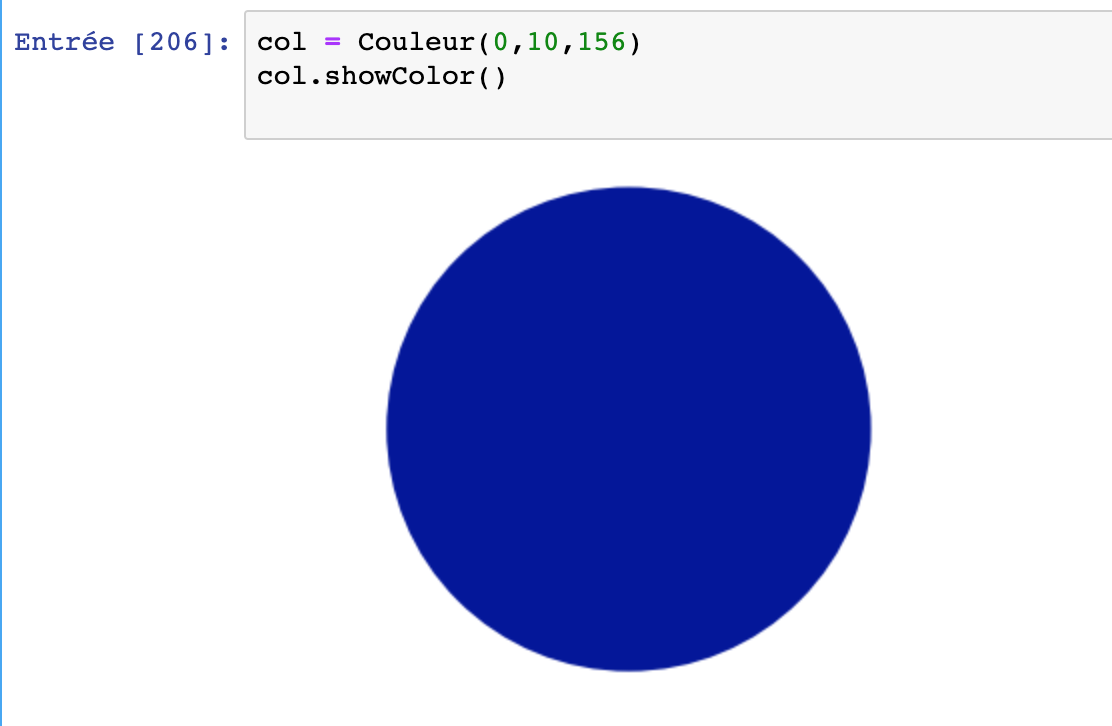

In [116]:
## Creer votre propre Type de données abstrait Couleur sous python avec les caractériistiques suivants:
class Couleur:
    '''
    Constructeur à 3 paramétres qui represente les valeurs entiéres des différentes couleurs
    '''
    def __init__(self, R, G,B,name = None):
        self.R = R
        self.G = G
        self.B = B
        
        
    '''
    Creer une couleur à partir d'une liste
    '''
    @staticmethod
    def creerCouleur(listeRGB):
        return Couleur(int(listeRGB[0]),int(listeRGB[1]),int(listeRGB[2]))
    
            
    
    '''
    Recupération de l'intensite de la couleur rouge
    '''
    def getR(self):
        return int(self.R)
    '''
    Recupération de l'intensite de la couleur verte
    '''
    def getG(self):
        return int(self.G)
    '''
    Recupération de l'intensite de la couleur verte
    '''
    def getB(self):
        return int(self.B)
    '''
    Version brillante de cet objet couleur
    Il faut caculer le meme pourcentage de R,G,B
    Ajouter ces valeurs aux valeurs R,G,B de l'objet couleur originel
    Retourne un objet couleur
    '''
    def brighter(self,pourcentage):
        r = self.getR()+self.getR()*pourcentage
        g = self.getG()+self.getG()*pourcentage
        b = self.getB()+self.getB()*pourcentage
        if r>255 or b>255 or g>255:
            print("Couleur innexistante")
        else:
            return Couleur(r,b,g)

    '''
    Version sombre de cet objet couleur
    
    Il suffit de multiplier toutes les composantes R, G, B par le pourcentage passé en paramétre
    
    https://graphicdesign.stackexchange.com/questions/75417/how-to-make-a-given-color-a-bit-darker-or-lighter
    
    Retourne un objet couleur
    '''
    def darker(self,pourcentage):
        r = self.getR()*pourcentage
        g = self.getG()*pourcentage
        b = self.getB()*pourcentage
        return Couleur(r,b,g)
    '''
    Chaine de caractére representant cet objet couleur
    Retourne un string contenant les valeurs des composantes R,G,B
    '''
    def toString(self):
        return f"Rouge : {self.getR()} Vert : {self.getG()} Bleu : {self.getB()}" 
    '''
    Comparaison de cet objet couleur avec color
    Retourne un booloean
    '''
    def equals(self,color):
        return self.getR() == color.getR() and self.getG() == color.getG() and self.getB() == color.getB()
    '''
     Calcul de la Luminance. La qualité des 
     images dans les écrans plasmas modernes est une combinaison linéaire des trois couleurs et est définie par
     l'equation Y = 0.299r + 0.587g + 0.114b
     
    '''
    def luminance(self):
         return 0.299*self.getR() + 0.587*self.getG() + 0.114*self.getB()
    '''
     Calcul du niveau de gris. Il faut remplacer chaque intensité de couleur par la valeur entiére de la luminance.
     Il faudra créer une nouvelle couleur avec des intensités égales à la luminance
    '''
    def grayScale(self):
        a = int(self.luminance())
        return Couleur(a,a,a)
    '''
     Compatibilité deux couleurs. Deux couleurs sont compatibles si la différence de leur luminance fait au moins 128
     Retourne un boolean qui vaut true si les deux couleurs sont compatibles et false sinon
    '''
    def compatible(self, couleur):
        dif = int(math.fabs(self.luminance()-couleur.luminance()))
        if dif<128:
            return False
        else:
            return True
    '''
     Addition de couleur
    '''
    def add(self, col):
        r = self.getR()+col.getR()
        g = self.getG()+col.getG()
        b = self.getB()+col.getB()
        if r>255 or b>255 or g>255:
            print("Addition impossiple une des valeurs depasse 255")
        else:
            return Couleur(r,g,b)

    '''
    Fonction permettant d'afficher une couleur dans un cercle. Vous pouvez l'utiliser.
    '''
    def showColor(self):
        fig, ax = plt.subplots()
        # create a grid to plot the color
        grid = np.mgrid[0.2:0.8:3j, 0.2:0.8:3j].reshape(2, -1).T
        # add a circle
        circle = mpatches.Circle(grid[0], 0.05, ec="none",color=(self.R/255,self.G/255,self.B/255))
        ax.add_patch(circle)
        #ax.add_line(line)

        plt.axis('equal')
        plt.axis('off')
        plt.tight_layout()

        plt.show()

        
    
   

In [117]:
col = Couleur(40,25,120)
cole = Couleur(255,2,86)



## Traitement d'image. 
Une image numérique est une grille rectangulaire de pixels (éléments d'image), où la couleur de chaque pixel est définie individuellement. Les images numériques sont parfois appelées images tramées ou bitmap. 
Le type de données Image vous permet de manipuler des images numériques. 

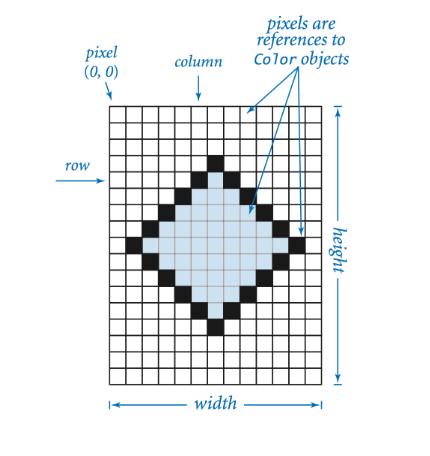
source: https://introcs.cs.princeton.edu/java/31datatype/

L'ensemble de valeurs est une matrice bidimensionnelle de valeurs de couleur, et les opérations sont celles auxquelles vous pouvez vous attendre: créer une image (vierge ou à partir d'un fichier), définir la valeur d'un pixel sur une couleur donnée et extraire la couleur d'un pixel donné. L'API suivante résume les opérations disponibles:

In [118]:
## Image Processing
class Picture:
    '''
    Creer une image à partir d'un fichier en utilisant la fonction imread() de matplotlig.image ou plus généralement la 
    librairie Pillow
    '''
    def __init__(self,nomFichier = None,H = None, W = None):
        if nomFichier == None:
                
            '''
            Creer une image blanche de hauteur H et de largeur W
            '''
            self.H = H
            self.W = W
            self.img = np.zeros((H,W,3))
        else:
                
            '''
            Creer une image à partir d'un fichier
            '''
            self.img = mpimg.imread(nomFichier)
            self.H = self.img.shape[1]
            self.W = self.img.shape[0]
        
    
    '''
    Retourne la hauteur H
    '''
    def getH(self):
        return int(self.H)
    '''
    Retourne la largeur W
    '''
    def getW(self):
        return int(self.W)
    '''
    Retourne le tableau numpy constituant l'image
    '''
    def getImg(self):
        return self.img
    '''
    Retourne les couleurs R,G, B sous forme de liste du pixel à la ligne row et la colonne col
    '''
    def getCouleur(self,row, col):
        a =  self.getImg()
        return a[row][col]
         
    '''
    Modifie les couleurs R,G,B du pixel à la ligne row et la colonne col
    '''
    def setCouleur(self,row, col,couleur):
        a = self.getImg()
        b = a.tolist()
        b[row][col] = couleur
        a = np.array(b)
        self.img = a
        
        
    '''
    Affiche une image
    '''
    def affiche(self):
        plt.imshow(self.img)
    '''
    Sauve  une image dans un fichier png
    '''
    def save(self, nomFichier):
        
        plt.imsave(nomFichier, self.img, format = 'png')
    
    
    
    

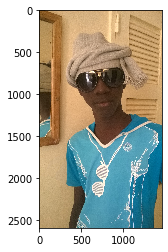

In [146]:
im = Picture("thilor.jpg")
im.affiche()


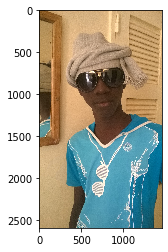

In [147]:
im.affiche()

## Convertir une image couleur en grayscale
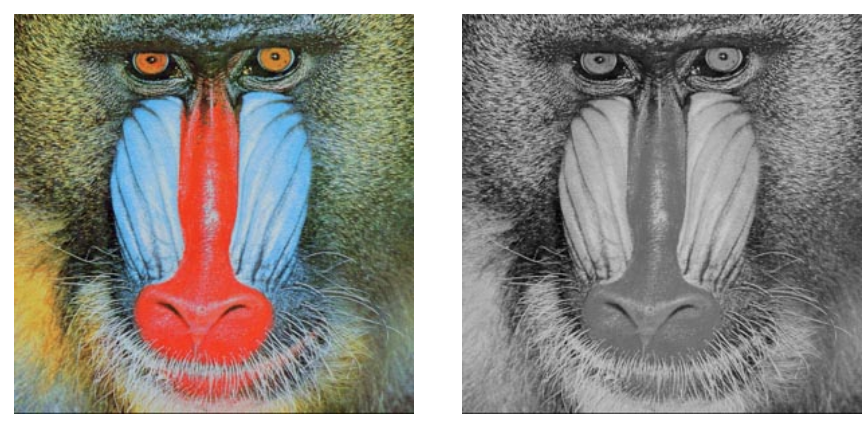



## Changer l'échelle d'une image en inversant la hauteur et la largeur en gardant les mêmes proportions
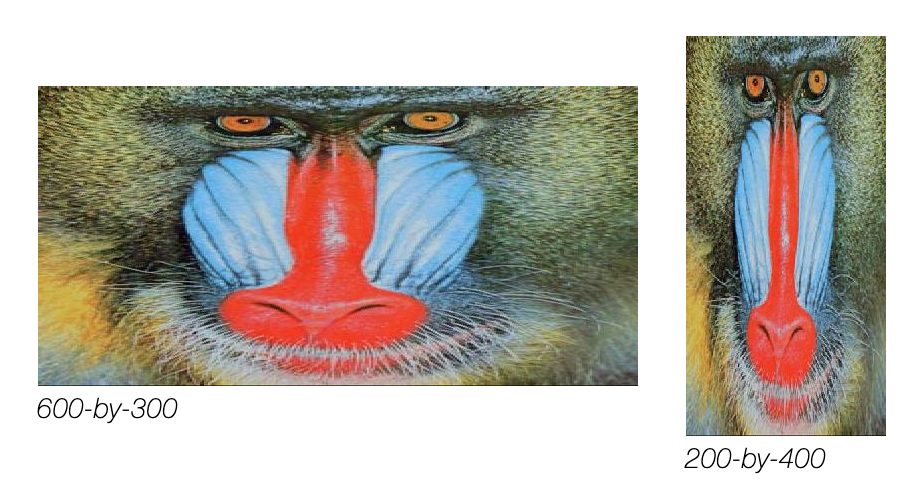



## Separation de couleurs
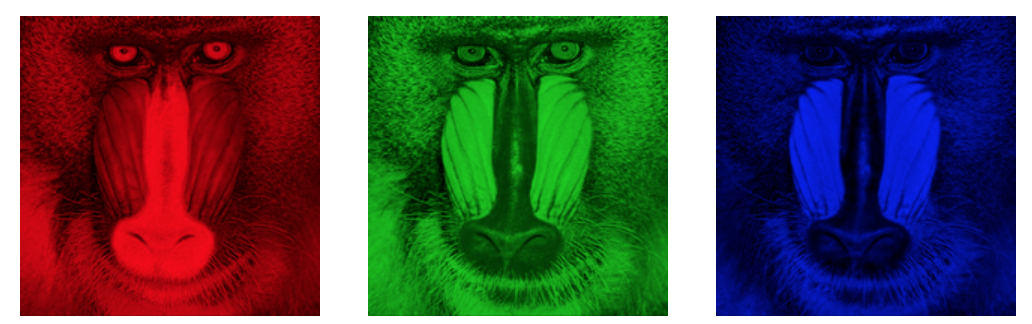

## Glass Filter
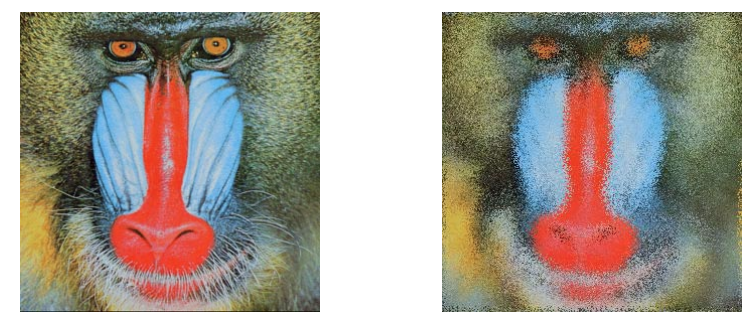

In [148]:
## Image processing
class ImageProcessing:
    
    def __init__(self,image):
        self.image = image
    '''
    Helper function
    '''
    def calGray(self,p):
        A = math.floor(0.299*p[0] + 0.587*p[1] + 0.114*p[2])
        return [A,A,A]
        
    '''
     Transformer en grayscale et visualiser l'image et sa transformée
     Appliquer les fonctions map, reduce ou filter pour reduire la complexite
    '''
    
    def gray(self,p):
        A = math.floor(0.299*int(p[0]) + 0.587*int(p[1]) + 0.114*int(p[2]))
        return [A,A,A]
    
    
    def transformGrayscaleMap(self):
        grayPicture = Picture(None,self.image.W,self.image.H)
        self.image.affiche()
        grayPicture = map(self.__calGray__,self.image[:,:,:])
        return grayPicture
        
    '''
     Transformer en grayscale et visualiser l'image et sa transformée
     Une classe gloutonne avec des boucles for
    '''
    def transformGrayscaleGlouton(self):
        ligne = self.image.getW()
        colonne = self.image.getH()
        R = Picture(None,colonne,ligne)
        R.img = np.copy(self.image.img)
        for i in range(ligne):
            for j in range(colonne):
                a = self.image.getCouleur(i,j)
                b = self.gray(a)
                R.img[i, j] = b
        R.affiche()
        
                
        
    '''
     Creer une image en inversant les proportions de l'image source. Afficher les deux images
    '''
    def transformScale(self):
        new = self.image   
        h = self.image.getH()
        w = self.image.getW()
        np.resize(new.img.shape,(w,h,3))
        print(type(new.img.shape))
        new.affiche()
    
    '''
    Fonction permettant de generer un pixel aleatoire pour le glassfilter
    '''
    def pxrand(self,col,row):
        h = self.image.getH()
        w = self.image.getW()
        a = random.randint(col+1,col+5)
        b = random.randint(row+1,row+5)
        while(b>=h):
            b = random.randint(row-5,row-1)
        while(a>=w):
            a = random.randint(col-5,col-1)
        return a,b

    
    '''
    Separer les couleurs d'une image et visualiser les trois couleurs
    ''' 
    
    def separerCouleur(self):
        h = self.image.getH()
        w = self.image.getW()
        R = Picture(None,h,w)
        G = Picture(None,h,w)
        B = Picture(None,h,w)
        R.img = np.copy(self.image.img)
        G.img = np.copy(self.image.img)
        B.img = np.copy(self.image.img)
        for i in range(self.image.img.shape[0]):
            for j in range(self.image.img.shape[1]):
                r, v, b = R.img[i,j]
                R.img[i, j] = (r, 0,0)
                G.img[i, j] = (0, v,0)
                B.img[i, j] = (0, 0,b)
        return R,G,B
   
    '''
    Filtre de glace: Affecter à chaque pixel p la couleur d'un pixel voisin choisi alétoirement
    (Les coordonnées du pixel et de p doivent différer d'au plus 5).
    Afficher les deux images 
    '''
    def filtreGlass(self):
        h = self.image.getH()
        w = self.image.getW()
        R = Picture(None,h,w)
        R.img = np.copy(self.image.img)
        for i in range(self.image.img.shape[0]):
            for j in range(self.image.img.shape[1]):
                k,l = self.pxrand(i,j)
                r, v, b = self.image.img[k,l]
                R.img[i, j] = (r, v,b)
        return R

Creation d'un objet de type image processing 

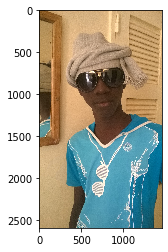

In [152]:
ime = ImageProcessing(im)
ime.image.affiche()

Conversion en grayscale

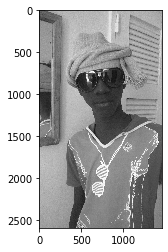

In [151]:
ime.transformGrayscaleGlouton()

Separation des couleurs

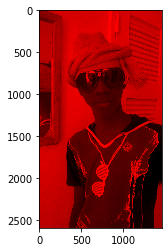

In [154]:
R,G,B = ime.separerCouleur()
R.affiche()

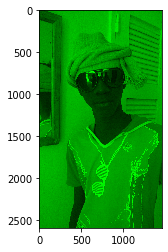

In [155]:
G.affiche()

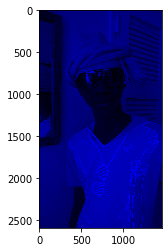

In [156]:
B.affiche()

Glassfilter

In [159]:
R = ime.filtreGlass()

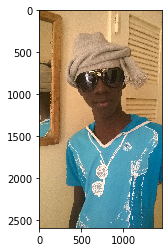

In [160]:
R.affiche()